# Detección de anomalias

La detección de anomalías se refiere a la identificación de elementos, eventos u observaciones poco comunes que se desvían significativamente de la mayoría de los datos.

#### ¿Para qué puede ser importante la detección de anomalías?

* Detección de fraudes: Identificación de transacciones inusuales que puedan indicar actividad fraudulenta.

* Seguridad de la red: Detección de accesos no autorizados o patrones inusuales en el tráfico de red.

* Control de calidad: Identificación de defectos o irregularidades en los procesos de fabricación.

* Diagnóstico médico: Detección de enfermedades raras o anomalías en imágenes médicas o cardiogramas.

## Métodos de detección de anomalías (Anomaly Detection)

### DBSCAN

Como ya vimos en el capítulo de cluster analysis, DBSCAN es capaz de localizar puntos "ruido". Siguiendo esa lógica, esta técnica puede ayudarnos en la detección de anomalías en función de una o varias variables

### One-Class SVM

Aprende una frontera que separa el espacio de los datos normales del resto. Intenta incluir la mayoría de los datos dentro de una "zona segura". Para conseguir esto debe ser entrenado con datos estrictamente normales, o en su mayoría. Ya que One-Class SVM no aprende a diferenciar clases como un clasificador tradicional, sino que modela la "forma" del conjunto de datos normal. Su objetivo es aprender una frontera que encierre la mayoría de los datos normales.

### Autoencoders

Los autoencoders por definición son redes neuronales que, por un lado, entrenan una red que reduce la dimensionalidad, eliminando datos redundantes. Principalmente es utilizado en imágenes. Por otro lado, la segunda parte del autoencoder aprende a decodificicar y reconstruir la imagen inicial. 

Los autoencoders aplicados a la detección de anomalías funcionan de manera similar. Se entrena la red con los datos normales, tanto la codificación como la decodificación. Posteriormente, se pasan los datos de validación, donde se quieren encontrar anomalías, en la segunda parte de la red, en la decodificación. Si se encuentran diferencias significativas en esa reconstrucción podremos considerar que existen anomalías.

<img src="https://cdn-images-1.medium.com/max/1600/0*eR7TDSjzC2S16w6t.png" alt="Second Image" style="width: 45%;"/>

### Isolation Forest

Isolation Forest es un algoritmo eficiente y escalable que detecta anomalías aislando puntos en el conjunto de datos.

Estos puntos son aislados a través de una serie de árboles aleatorios. Son aleatorios en el sentido de que cada uno utiliza solo una variable, seleccionada aleatoriamente, y los puntos de corte que se van usando para aislar a cada punto también son aleatorios.

La idea es que las anomalías serán más fáciles de aislar, por lo tanto sus "ramas" serán más cortas. Posteriormente, Se calcula para cada punto el promedio de longitudes de los caminos en todos los árboles, del que se calcula una puntuación (Score).

$Score \approx 1$: Alta probabilidad de ser anomalía

$Score \le 0.5$: Punto normal


### Deep Isolation Forest

Deep Isolation Forest (Deep iForest) es una versión mejorada y profunda del algoritmo clásico Isolation Forest. Combina **representaciones profundas de los datos** (aprendidas mediante redes neuronales) con la lógica de aislamiento propia de Isolation Forest.

Se entrena una red neuronal para generar una serie de representaciones matemáticas a partir de los datos originales. Éstas son después insertadas en un Isolation Forest para calcular el mismo Score.

Es un algoritmo bastante novedoso por lo que todavía no está implementado en ninguna librería como tal. Debemos descargarlo del repositorio de GitHub. Encuentra aquí toda la documentación https://github.com/xuhongzuo/deep-iforest


Parameters:
    
    network_name: str (default='mlp')
        the used network backbone

    n_ensemble: int (default=50):
        The number of representations in the ensemble

    n_estimators : int (default=6)
        The number of isolation trees per representation.

    hidden_dim: list, default=[500,100]
        the list of units number of hidden layers

    rep_dim: int, default=20
        the dimensionality of representations

    dropout: None or float, default=None
        whether use dropout in the network
            - if float, represent the dropout probability

    activation: str, default='tanh'
        the name of activation function, {'relu', 'tanh', 'sigmoid', 'leaky_relu'}

    data_type: str, default='tabular'
        the processed data type, {'tabular', 'ts', 'graph'}

    batch_size: int, default=64
        the number of data objects per mini-batch

## Ejemplo Isolation Forest

C:\Users\bvazq\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\bvazq\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
C:\Users\bvazq\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


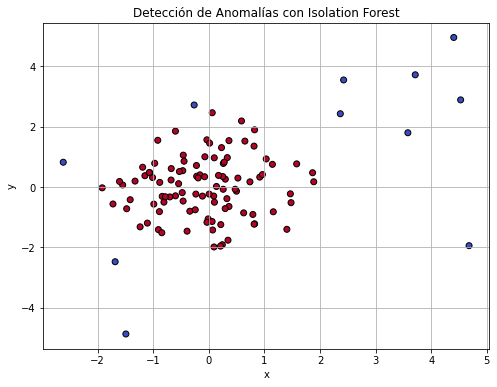

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# 1. Crear datos de ejemplo
np.random.seed(42)
normal_data = np.random.normal(0, 1, size=(100, 2))  # Datos normales
anomalous_data = np.random.uniform(low=-6, high=6, size=(10, 2))  # Datos anómalos
data = np.concatenate([normal_data, anomalous_data], axis=0)
df = pd.DataFrame(data, columns=["x", "y"])

# 2. Entrenar Isolation Forest
model = IsolationForest(contamination=0.1, random_state=42)
df["anomaly"] = model.fit_predict(df[["x", "y"]])

# 3. Visualizar resultados
plt.figure(figsize=(8, 6))
plt.scatter(df["x"], df["y"], c=df["anomaly"], cmap="coolwarm", edgecolors="k")
plt.title("Detección de Anomalías con Isolation Forest")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()


## Ejemplo con Deep Isolation Forest

Es un algoritmo bastante novedoso por lo que todavía no está implementado en ninguna librería como tal. Debemos descargarlo del repositorio de GitHub. Ejecuta este código en la CMD

```bash
git clone https://github.com/xuhongzuo/deep-iforest.git
cd deep-iforest
pip install -r requirements.txt
```

Vamos a usar los datos de trucks en donde tenemos una serie de métricas de dispositivos integrados en los camiones. Por otro lado tenemos una clase pos/neg que indica si realmente tuvo un fallo.

A través del análisis de detección de anomalías y Deep Isolation Forest vamos a encontrar valores extremos que podamos catalogar como anómalos y dar así la voz de alarma de que el camión necesita pasar por el taller.

En el último paso analizamos el score y lo comparamos con la clase verdadera, para comprobar si nos funciona la manera de abordar el problema.

In [2]:
# !pip install torch_geometric
# from deepiforest.algorithms.dif import DIF

import sys
import os
sys.path.append(os.path.abspath("./deep-iforest"))
from algorithms.dif import DIF

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

In [7]:
def score_anomalia(X_train, X_test, X_val, df_test, df_val, scoreName, model_configs, printPlot = False):

    model_configs = model_configs
    model = DIF(**model_configs)
    model.fit(X_train)
    score = model.decision_function(X_test)
    score_val = model.decision_function(X_val)

    df_test[scoreName] = score
    df_val[scoreName] = score_val

    print('score anomalia máximo', round(max(df_test[scoreName]),4))
    if printPlot:
        plt.hist(df_test[scoreName])

    return df_test,score,df_val, score_val

In [8]:
model_configs = {'n_ensemble':5, 'n_estimators':6, 'rep_dim':500, 'device':'cpu',
                 'hidden_dim':[5000,1000],
                 'dropout':0.15,'activation':'relu',
                 'data_type':'ts', 'batch_size':200}

In [78]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Carga del dataset
df = pd.read_csv('./../../Data/Modelos ML/aps_failure_training_set.csv')  # las primeras filas son comentarios

# Reemplazar los valores faltantes 'na' por NaN y convertir a float
df.replace('na', np.nan, inplace=True)
# df = df.fillna(0)  # O puedes imputar
df = df.dropna()
labels = df['class']
df['class_int'] = (labels == 'pos').astype(int)


In [79]:
df.shape

(591, 172)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(df, 
                                                    df[['class']], test_size=0.4, random_state=0)

X_test, X_val, y_test, y_val = train_test_split(X_test, 
                                                    X_test[['class']], test_size=0.4, random_state=0)
X_train = X_train.drop('class', axis = 1)
X_test = X_test.drop('class', axis = 1)
X_val = X_val.drop('class', axis = 1)

In [81]:
X_train_normal = X_train[X_train['class_int']==0]
X_train_anomal = X_train[X_train['class_int']==1]
X_train_normal = X_train_normal.drop('class_int', axis = 1)

X_test_normal = X_test[X_test['class_int']==0]
X_test_anomal = X_test[X_test['class_int']==1]
X_test_normal = X_test_normal.drop('class_int', axis = 1)
X_test_anomal = X_test_anomal.drop('class_int', axis = 1)
X_test = X_test.drop('class_int', axis = 1)
df_test = pd.DataFrame(X_test)

X_val_normal = X_val[X_val['class_int']==0]
X_val_anomal = X_val[X_val['class_int']==1]
X_val_normal = X_val_normal.drop('class_int', axis = 1)
X_val = X_val.drop('class_int', axis = 1)
df_val = pd.DataFrame(X_val)

scaler = StandardScaler()
scaler_nor = scaler.fit(X_train_normal)
X_train_normal_sc = scaler_nor.transform(X_train_normal)
X_test_normal_sc = scaler_nor.transform(X_test_normal)
X_test_anomal_sc = scaler_nor.transform(X_test_anomal)
X_val_normal_sc = scaler_nor.transform(X_val_normal)


network additional parameters: {'n_hidden': [5000, 1000], 'n_emb': 500, 'skip_connection': None, 'dropout': 0.15, 'activation': 'relu', 'be_size': 50}
score anomalia máximo 0.5471


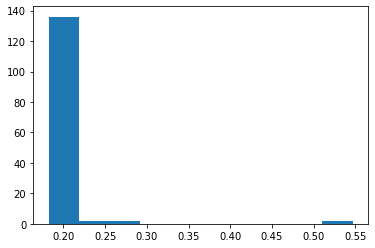

In [22]:
t_in = X_train_normal_sc

model_configs = {'n_ensemble':50, 'n_estimators':16, 'rep_dim':500, 'device':'cpu',
                 'hidden_dim':[5000,1000],
                 'dropout':0.15,'activation':'relu',
                 'data_type':'ts', 'batch_size':200}

df_test_score,score, df_val, score_val = score_anomalia(t_in, X_test_sc, X_val_sc, df_test,df_val, 'score', model_configs, printPlot = True)

### Conclusiones del análisis

Hemos dividido los datos en Train y Test. Después los hemos estandarizado, pues tenían escalas muy diferentes.

Los datos introducidos en el algoritmo DIF están en **formato array**, no dataframe. Es así como entiende que deben ser introducidos, si no da error.

Definimos una serie de parámetros que indican cómo es nuestro algoritmo. Éste nos ha devuelto un score, analizamos su distribución en el gráfico.

A partir de ahí, hemos filtrado por los que tienen un score superior a 0.3 y comparado su ratio de positivos y negativos con el ratio del conjunto de test completo. 

In [23]:
df_val['y_val'] = y_val
df_val = df_val[['y_val','score']]
df_val.loc[df_val['score']>=0.3, 'anomalia'] = 1
df_val.loc[df_val['score']<0.3, 'anomalia'] = 0

pd.crosstab(df_val['y_val'], df_val['anomalia'])

anomalia,0.0,1.0
y_val,,
neg,80,5
pos,5,5


## Ejemplo con autoencoder

In [93]:
input_dim = X_train_normal_sc.shape[1]
encoding_dim = 32

input_layer = Input(shape=(input_dim,))
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)
decoded = Dense(16, activation='relu')(encoded)
decoded = Dense(32, activation='relu')(decoded)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(input_dim, activation='linear')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse', metrics=['MeanAbsoluteError'])
autoencoder.summary()


Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 170)]             0         
                                                                 
 dense_67 (Dense)            (None, 128)               21888     
                                                                 
 dense_68 (Dense)            (None, 64)                8256      
                                                                 
 dense_69 (Dense)            (None, 32)                2080      
                                                                 
 dense_70 (Dense)            (None, 16)                528       
                                                                 
 dense_71 (Dense)            (None, 32)                544       
                                                                 
 dense_72 (Dense)            (None, 64)                211

In [94]:
history = autoencoder.fit(
    X_train_normal_sc, X_train_normal_sc,
    epochs=50,
    batch_size=256,
    shuffle=True,
    validation_data=(X_val_normal_sc, X_val_normal_sc)
)

Epoch 1/50
2/2 [==============================] - 3s 414ms/step - loss: 0.9594 - mean_absolute_error: 0.4282 - val_loss: 27.3972 - val_mean_absolute_error: 0.4961
Epoch 2/50
2/2 [==============================] - 0s 74ms/step - loss: 0.9492 - mean_absolute_error: 0.4267 - val_loss: 27.3126 - val_mean_absolute_error: 0.4929
Epoch 3/50
2/2 [==============================] - 0s 73ms/step - loss: 0.9415 - mean_absolute_error: 0.4261 - val_loss: 27.2772 - val_mean_absolute_error: 0.4936
Epoch 4/50
2/2 [==============================] - 0s 72ms/step - loss: 0.9302 - mean_absolute_error: 0.4256 - val_loss: 27.2917 - val_mean_absolute_error: 0.4975
Epoch 5/50
2/2 [==============================] - 0s 91ms/step - loss: 0.9077 - mean_absolute_error: 0.4242 - val_loss: 27.3249 - val_mean_absolute_error: 0.5054
Epoch 6/50
2/2 [==============================] - 0s 82ms/step - loss: 0.8752 - mean_absolute_error: 0.4231 - val_loss: 27.4035 - val_mean_absolute_error: 0.5212
Epoch 7/50
2/2 [===========

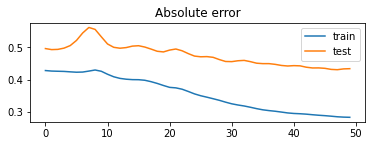

In [95]:
from matplotlib import pyplot
pyplot.subplot(211)
pyplot.title('Absolute error')
pyplot.plot(history.history['mean_absolute_error'], label='train')
pyplot.plot(history.history['val_mean_absolute_error'], label='test')
pyplot.legend()

In [96]:
# X_train_normal_sc = scaler_nor.transform(X_train_normal)
# X_test_normal_sc = scaler_nor.transform(X_test_normal)
# X_test_anomal_sc = scaler_nor.transform(X_test_anomal)
# X_val_normal_sc = scaler_nor.transform(X_val_normal)

# Reconstruir todas las muestras
X_pred = autoencoder.predict(X_test_normal_sc)

# Error de reconstrucción (MSE por muestra)
reconstruction_errors = np.mean(np.square(X_test_normal_sc - X_pred), axis=1)


5/5 [==============================] - 0s 3ms/step


In [97]:
reconstruction_errors.round(2)

array([ 0.25,  0.09,  0.39,  0.35,  0.78,  0.08,  0.27,  0.19,  0.12,
        0.07,  0.15,  0.24, 10.8 ,  0.19,  0.59,  1.65,  0.07,  1.27,
        0.17,  0.14,  0.03,  2.31,  1.44,  0.16,  0.3 ,  0.89,  0.32,
        0.12,  1.42,  0.08,  0.14,  0.06,  0.14,  0.13,  0.36,  0.43,
        0.27,  0.21,  0.08,  0.11,  0.2 ,  0.27,  0.15,  0.18,  2.48,
        0.53,  0.32,  0.32,  0.13,  0.29,  0.66,  0.09,  0.09,  0.13,
        0.09,  0.08,  0.1 ,  0.18,  0.13,  0.11,  0.1 ,  0.07,  0.45,
        0.06,  0.73,  0.14,  0.17,  0.1 ,  0.11,  0.27,  0.07,  0.21,
        0.75,  0.12,  3.97,  0.2 ,  3.74,  1.15,  0.14,  0.94,  0.59,
        0.08,  0.06,  0.05,  0.07,  0.09,  0.56,  0.06,  0.15,  0.09,
        0.12,  0.07,  0.1 ,  0.16,  0.33,  0.24,  0.09,  0.09,  1.87,
        3.99,  0.16,  0.09,  0.11,  1.18,  0.05, 10.59,  0.08,  0.55,
        0.42,  0.44,  2.48,  0.4 ,  0.23,  0.09,  0.18,  0.15,  0.11,
        0.14,  0.16,  0.1 ,  1.1 ,  0.15,  0.1 ,  0.16,  0.11,  0.1 ,
        0.14,  0.08,

In [98]:

# Por ejemplo, umbral al percentil 95
threshold = np.percentile(reconstruction_errors, 95)

print(f"Umbral de reconstrucción: {threshold:.4f}")


Umbral de reconstrucción: 2.4021
